In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None

| Field                            | Description                                                  |
|----------------------------------|--------------------------------------------------------------|
| Interview Id                     | Id for the interview                                        |
| Candidate Id                     | Id for the candidate                                        |
| Interviewer Id                   | Id for the interviewer                                      |
| Profile                          | Profile type                                                |
| S.L.R.C (Speak to Listen Ratio Candidate) | Ratio of speaking time to listening time of the Candidate |
| S.L.R.I (Speak to Listen Ratio Interviewer) | Ratio of speaking time to listening time of the Interviewer |
| A.T.T Avg Turn Time (Interactivity Time) | Average time for a single interaction between Interviewer and Candidate |
| L.M.I (Longest Monologue Interviewer) | Longest time the interviewer spoke continuously |
| L.M.C (Longest Monologue Candidate) | Longest time the candidate spoke continuously |
| S.R (SILENCE RATIO)              | Percentage of time when no one spoke                       |
| L.J.T.C (Late Joining Time Candidate) | Amount of time candidate joined late for the interview call |
| L.J.T.I (Late Joining Time Interviewer) | Amount of time the interviewer joined late for the interview call |
| N.I.C (Noise Index Candidate)     | Percentage of Background Noise on the candidate side       |
| N.I.I (Noise Index Interviewer)   | Percentage of Background Noise on the interviewer side     |
| S.P.I (Speaking Pace interviewer) | Average words spoken per minute by the interviewer          |
| S.P.C (Speaking Pace Candidate)   | Average words spoken per minute by the candidate            |
| L.A.I (Live Absence interviewer)  | Percentage of time the interviewer was not present in the video call |
| L.A.C (Live Absence candidate)    | Percentage of time the candidate was not present in the video call |
| Q.A (Question asked during the interview) | Number of questions asked during the interview      |
| P.E.I (Perceived Emotion Interviewer) | Perceived emotion of the interviewer (Positive or Negative) |
| P.E.C (Perceived Emotion Candidate) | Perceived emotion of the candidate (Positive or Negative) |
| Compliance ratio                 | Ratio of assigned questions to questions actually asked  |
| Interview Duration               | Duration of the interview in minutes                       |
| Interview Intro                  | Whether the interviewer gave a self-introduction to the candidate |
| Candidate Intro                  | Whether the candidate gave a self-introduction to the interviewer |
| Opp to ask                       | Whether the interviewer provided an opportunity for the candidate to ask questions at the end |
| Status                           | Status of the candidate                                      |


In [3]:
# Reading the dataset
train_df = pd.read_csv('train_IA_-_train.csv')
train_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [4]:
# Checking shape of train_df
train_df.shape

(5800, 27)

In [5]:
# Checking train_df info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [6]:
# Checking Duplicate Rows
train_df.duplicated().sum()

0

In [7]:
# Checking Null Values in train_df
train_df.isnull().sum()[train_df.isnull().sum() > 0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
Status               4
dtype: int64

In [8]:
# Dropping the records for which the output column "Status" has null values
train_df = train_df[train_df['Status'].notnull()]

In [9]:
train_df.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [10]:
# Dropping Irrelevant Columns
train_df.drop(columns=['Interview Id', 'Candidate Id', 'Interviewer Id'], inplace=True)

In [11]:
train_df.shape

(5796, 24)

#### Observations:
- The dataset contains various interview-related metrics and information, with "Status" serving as the output column indicating the status of the candidates.
- There were no duplicate records.
- There were 4 null values in the output column 'status', which have been dropped.
- There are some null values in 4 other columns. These shall be dealt with later.
- Since all the values in 'Interview Id' and 'Candidate Id' we unique, they failed to provide any relevant information and were dropped.

# Exploratory Data Analysis

In [12]:
cat_col = [col for col in train_df.columns if train_df[col].dtypes=='object']
num_col = [col for col in train_df.columns if train_df[col].dtypes!='object']

# Removing 'Status' from cat_col list since it is the target variable
cat_col.remove('Status')

print(f"Categorical Features: {cat_col}")
print(f"Numerical Features: {num_col}")

Categorical Features: ['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']
Numerical Features: ['S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio', 'Interview duration']


## Analyzing Categorical Features

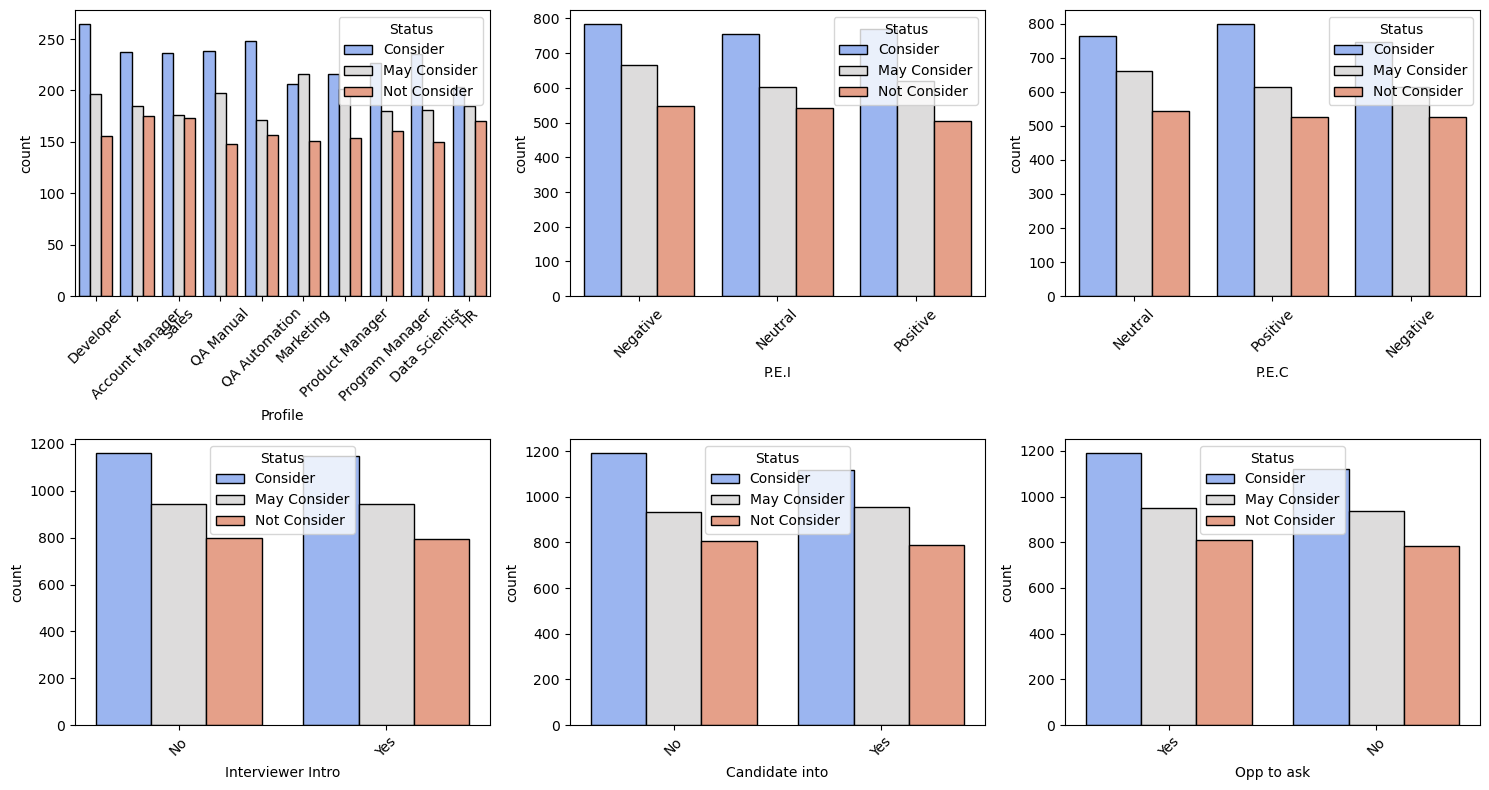

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axs = axs.flatten()

for i,j in enumerate(cat_col):
    sns.countplot(data=train_df, x=j, ax=axs[i], order = train_df[cat_col[i]].value_counts().index, hue='Status', 
                  palette = "coolwarm", edgecolor = "black")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Observations:
- Almost similar number of interviews were held for all the different profiles, with number of interviews held for 'devoloper' profile being slightly higher than the rest of the profiles.
- Percieved emotion of interviewer and candidate does not seem to affect the Status of candidate as much, since their distributions are almost similar for all the emotions.
- Interviewer Intro also does not affect the status of the candidate as much since the frequency distributions are almost similar as well
- Candidate Intro might affect the status of the candidate as we can see that candidates who give an introduction have somewhat higher chances to be considered.

## Analyzing Numerical Features

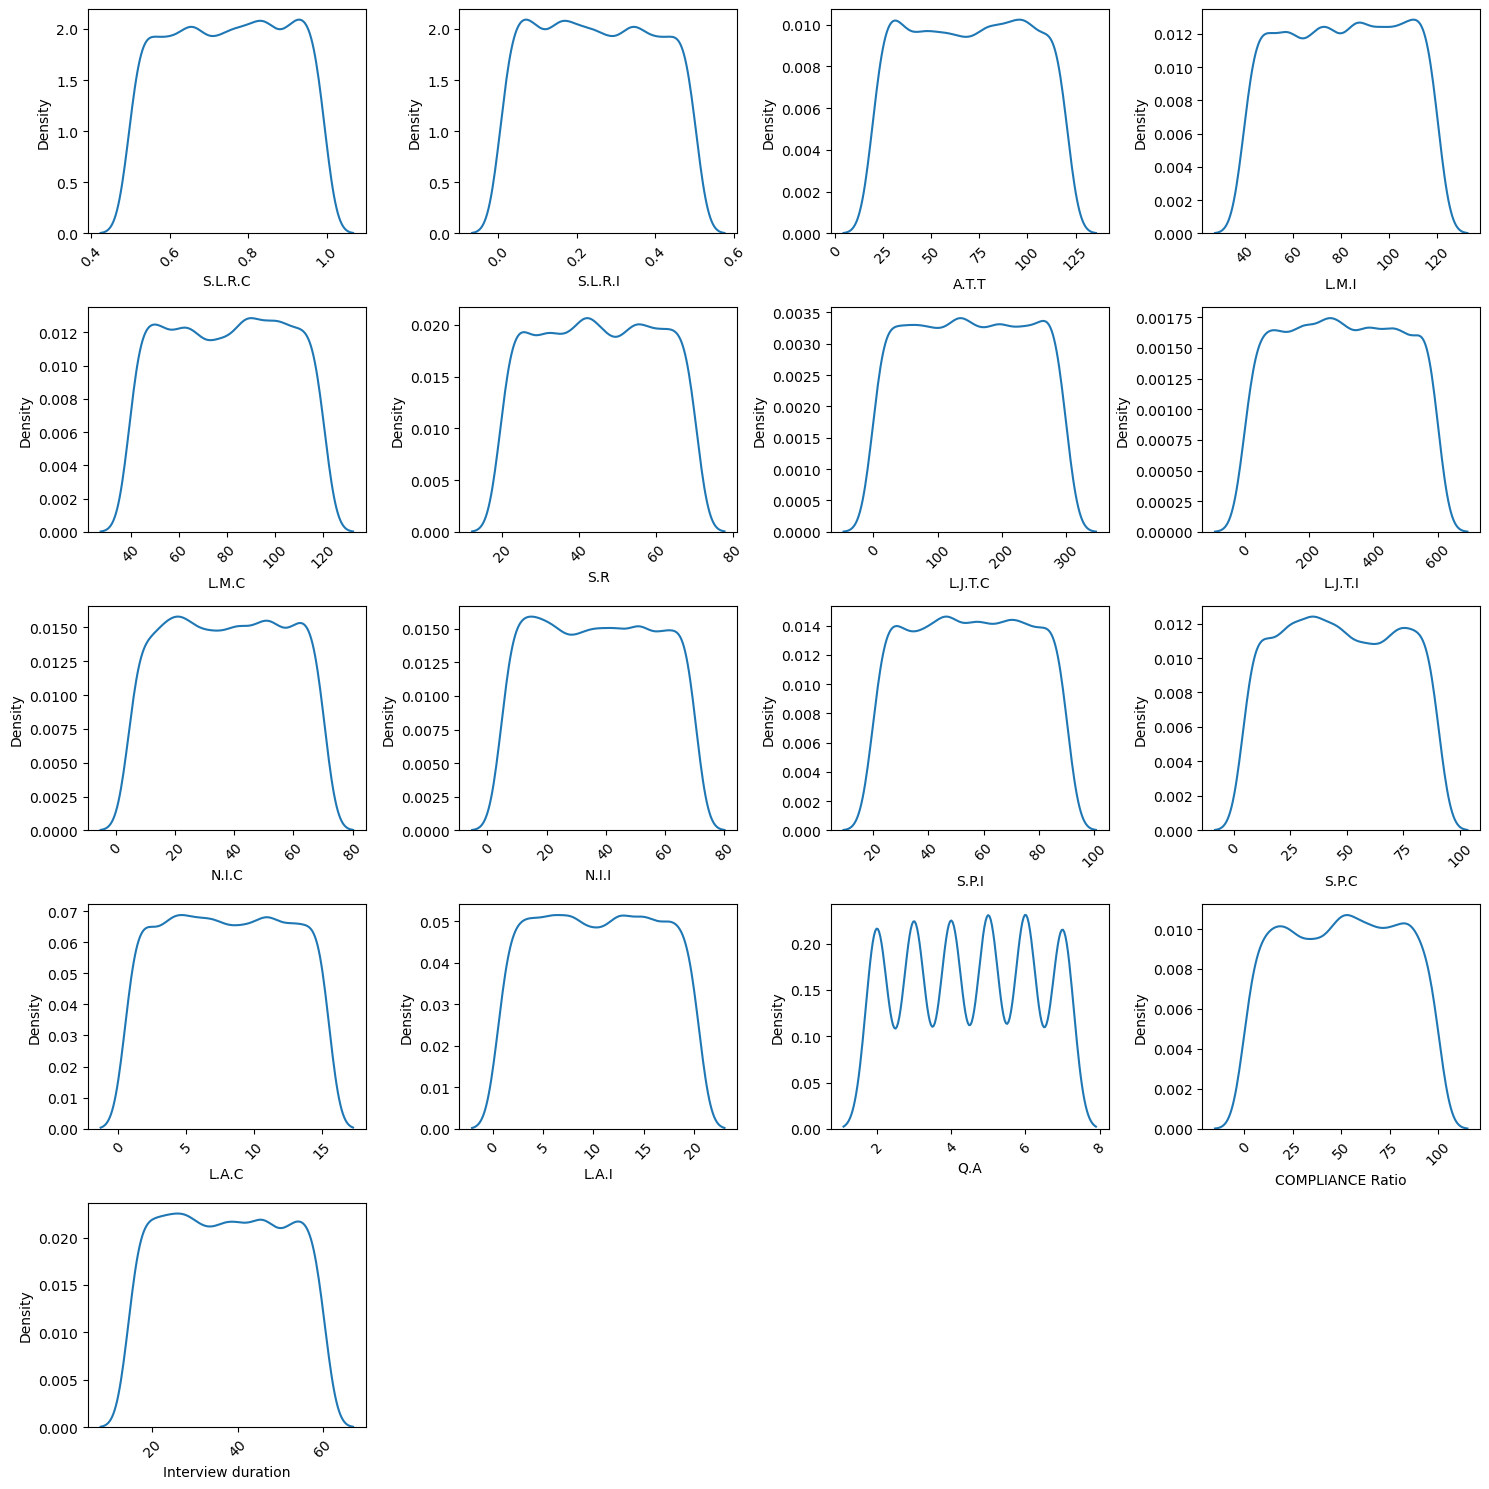

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15,15))
axs = axs.flatten()

for i,j in enumerate(num_col):
    sns.kdeplot(data=train_df, x=j, ax=axs[i])
    axs[i].tick_params(axis='x', rotation=45)

plt.delaxes(axs[-1])
plt.delaxes(axs[-2])
plt.delaxes(axs[-3])
plt.tight_layout()
plt.show()

# Basic Preprocessing

## Handling Null Values

In [15]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
dtype: int64

All the above features are categorical and their missing values can be filled using the 'mode' value of the respective column.

In [16]:
# Handling Missing Values
missing_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Opp to ask']

# Filling missing values using Simple imputer with method = 'most_frequent'
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')

train_df[missing_cols] = pd.DataFrame(si.fit_transform(train_df[missing_cols]), index=train_df.index, columns=missing_cols)

In [17]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

# Train Test Split

In [18]:
X = train_df.drop(columns = 'Status')
y = train_df['Status']

In [19]:
## Train_Test_Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (4636, 23)
Shape of X_val: (1160, 23)
Shape of y_train: (4636,)
Shape of y_val: (1160,)


### Encoding Categorical Features

In [20]:
# Encoding Categorical features
ord_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive'], ['Negative', 'Neutral', 'Positive'], ['No','Yes'], ['No','Yes'], ['No','Yes']])
X_train[ord_cols] = pd.DataFrame(ord_enc.fit_transform(X_train[ord_cols]), columns=ord_cols, index=X_train.index)
X_val[ord_cols] = pd.DataFrame(ord_enc.transform(X_val[ord_cols]), columns=ord_cols, index=X_val.index)

In [21]:
# One-Hot-Encoding the Profile column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[['Profile']]), index=X_train.index, columns = sorted(X_train['Profile'].unique()))
temp_X_val = pd.DataFrame(ohe.transform(X_val[['Profile']]), index=X_val.index, columns = sorted(X_val['Profile'].unique()))

# Concatting the one-hot-encoded columns with their respective dataframes
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_val = pd.concat([X_val, temp_X_val], axis=1)

# Dropping the Profile column
X_train.drop(columns = 'Profile', inplace = True)
X_val.drop(columns = 'Profile', inplace = True)

In [22]:
# Encoding target column using replace method
y_train.replace({'Not Consider':0, 'May Consider':1, 'Consider':2}, inplace=True)
y_val.replace({'Not Consider':0, 'May Consider':1, 'Consider':2}, inplace=True)

# Applying Algorithms

In [23]:
from sklearn.metrics import classification_report

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Defining Logistic Regression and fitting on train_data
lr = LogisticRegression(random_state=15, max_iter=5000)
lr.fit(X_train, y_train)

# Taking predictions on val data
y_pred_val = lr.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr.score(X_train, y_train)}")
print(f"Accuracy on val_data: {lr.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9984900776531492
Accuracy on val_data: 0.9939655172413793
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       319
           1       0.99      0.99      0.99       378
           2       1.00      1.00      1.00       463

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



## 2. SVC (Support Vector Classifier)

In [25]:
from sklearn.svm import SVC

# Defining SVC and fitting to the train data
svc = SVC(random_state=15, kernel = 'linear', max_iter=100000)
svc.fit(X_train, y_train)

# Taking predictions on val data
y_pred_val = svc.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {svc.score(X_train, y_train)}")
print(f"Accuracy on val_data: {svc.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9995685936151855
Accuracy on val_data: 0.9974137931034482
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       319
           1       0.99      1.00      1.00       378
           2       1.00      1.00      1.00       463

    accuracy                           1.00      1160
   macro avg       1.00      1.00      1.00      1160
weighted avg       1.00      1.00      1.00      1160



# Preparing Test Data for Predictions

In [26]:
test_df = pd.read_csv('test_IA_-_test.csv')
test_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [27]:
# Dropping irrelevant columns and saving the dataframe as df_test
drop_cols = ['Interview Id', 'Candidate Id', 'Interviewer Id']
df_test = test_df.drop(columns = drop_cols)

In [28]:
# Checking Null values
df_test.isnull().sum()[df_test.isnull().sum() > 0]

S.L.R.I              1
L.J.T.C              1
S.P.I                2
L.A.I                1
Q.A                  1
P.E.I                2
P.E.C                2
COMPLIANCE Ratio     1
Interviewer Intro    2
dtype: int64

In [29]:
missing_cols_mode = ['Q.A', 'P.E.I', 'P.E.C', 'Interviewer Intro']
missing_cols_mean = ['S.L.R.I', 'L.J.T.C', 'S.P.I', 'L.A.I', 'COMPLIANCE Ratio']

# Filling missing values in mode_cols using mode values
si_mode = SimpleImputer(strategy = 'most_frequent')
df_test[missing_cols_mode] = pd.DataFrame(si_mode.fit_transform(df_test[missing_cols_mode]), index=df_test.index, columns=missing_cols_mode)

# Filling Missing values in mean_cols using mean value
si_mean = SimpleImputer(strategy='mean')
df_test[missing_cols_mean] = pd.DataFrame(si_mean.fit_transform(df_test[missing_cols_mean]), index=df_test.index, columns=missing_cols_mean)

In [30]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

### Encoding Categorical features


In [31]:
ord_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']

# encoding ord_cols using Ordinal Encoder
ord_enc = OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive'], ['Negative', 'Neutral', 'Positive'], ['No','Yes'], ['No','Yes'], ['No','Yes']])
df_test[ord_cols] = pd.DataFrame(ord_enc.fit_transform(df_test[ord_cols]), columns=ord_cols, index=df_test.index)

In [32]:
# Encoding Profile column using One-hot-Encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

temp_df_test = pd.DataFrame(ohe.fit_transform(df_test[['Profile']]), index=df_test.index, columns=sorted(df_test['Profile'].unique()))
df_test = pd.concat([df_test, temp_df_test], axis=1)
df_test.drop(columns = 'Profile', inplace = True)

# Taking Predictions on df_test

In [33]:
## 1. Using SVC model
predictions = svc.predict(df_test)
y_pred_test = pd.Series(predictions, index=df_test.index, name='Status')

In [34]:
y_pred_test.replace({0:'Not Consider', 1:'May Consider', 2:'Consider'}, inplace = True)

In [35]:
y_pred_test.value_counts()

Status
Consider        488
May Consider    402
Not Consider    310
Name: count, dtype: int64

## Preparing and saving Submission File to CSV

In [36]:
# submission = pd.concat([test_df['Interview Id'], y_pred_test], axis=1)
# submission

In [37]:
# # Saving submission dataframe to a csv file
# submission.to_csv('submission_svc.csv', index=False)